In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())


# Поменять тип колонны 'Дата' на 'datatime64'


df['Дата'] = pd.to_datetime(df['Дата'])

df.dtypes

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


,0
Дата,datetime64[ns]
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Проверяем формат столбцов

In [ ]:
df.dtypes

,0
Дата,object
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Сразу переведем столбец "Дата" в правильный формат

In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'})
print(grouped_df)

            Количество
Дата                  
2018-01-04        3734
2018-01-05        3643
2018-01-06        3193
2018-01-07        3298
2018-01-09        4055
...                ...
2018-08-26        5302
2018-08-28        5983
2018-08-29        4969
2018-08-30        4648
2018-08-31        4570

[205 rows x 1 columns]


Вывести несколько первых строк сгруппированных данных

In [ ]:
grouped_df.head()

,Количество
Дата,
2018-01-04,3734
2018-01-05,3643
2018-01-06,3193
2018-01-07,3298
2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

<Axes: xlabel='Дата'>

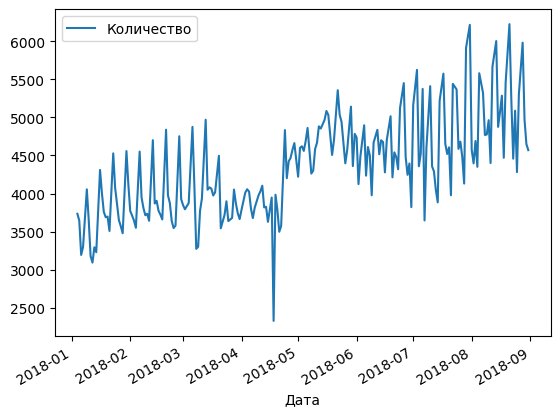

In [ ]:
grouped_df.plot()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике изображена динамика продаж в определенные даты в 2018 году. Ось X представляет даты, начиная с января и заканчивая сентябрем 2018 года. Ось Y показывает количество продаж (обозначенное как "Количество").

В целом, график демонстрирует как краткосрочные циклы колебаний, так и долгосрочный тренд роста продаж.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [ ]:
df[df['Количество'] == df['Количество'].max()]

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [ ]:
df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Склад'] == 3)].groupby('Номенклатура').agg({'Количество': 'sum'}).sort_values('Количество', ascending=False).head(1)

,Количество
Номенклатура,
product_1,16046


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [95]:
weather_df = pd.read_excel('/content/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls')

weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M')
weather_df.dtypes

weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане']).dt.date

# Specify numeric_only=True to calculate the mean only for numeric columns
weather_df = weather_df.groupby('Местное время в Астане', as_index=False).mean(numeric_only=True)

weather_df

# Переведем столбец "Дата" в правильный формат
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d-%m-%Y')

# Оставить только колонку 'T'
weather_df = weather_df[['Местное время в Астане', 'T']]
weather_df.dtypes


,0
Местное время в Астане,datetime64[ns]
T,float64


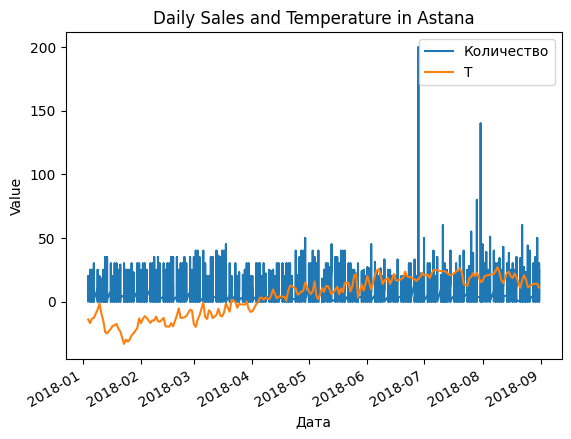

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your previous code to load and prepare 'df' and ensure weather_df is a DataFrame) ...

# Correct merging (assuming weather_df is a DataFrame)
merged_df = pd.merge(df, weather_df, left_on='Дата', right_on='Местное время в Астане')
merged_df

# Plotting
merged_df.plot(x='Дата', y=['Количество', 'T'], title="Daily Sales and Temperature in Astana")
plt.xlabel("Дата")
plt.ylabel("Value")
plt.show()

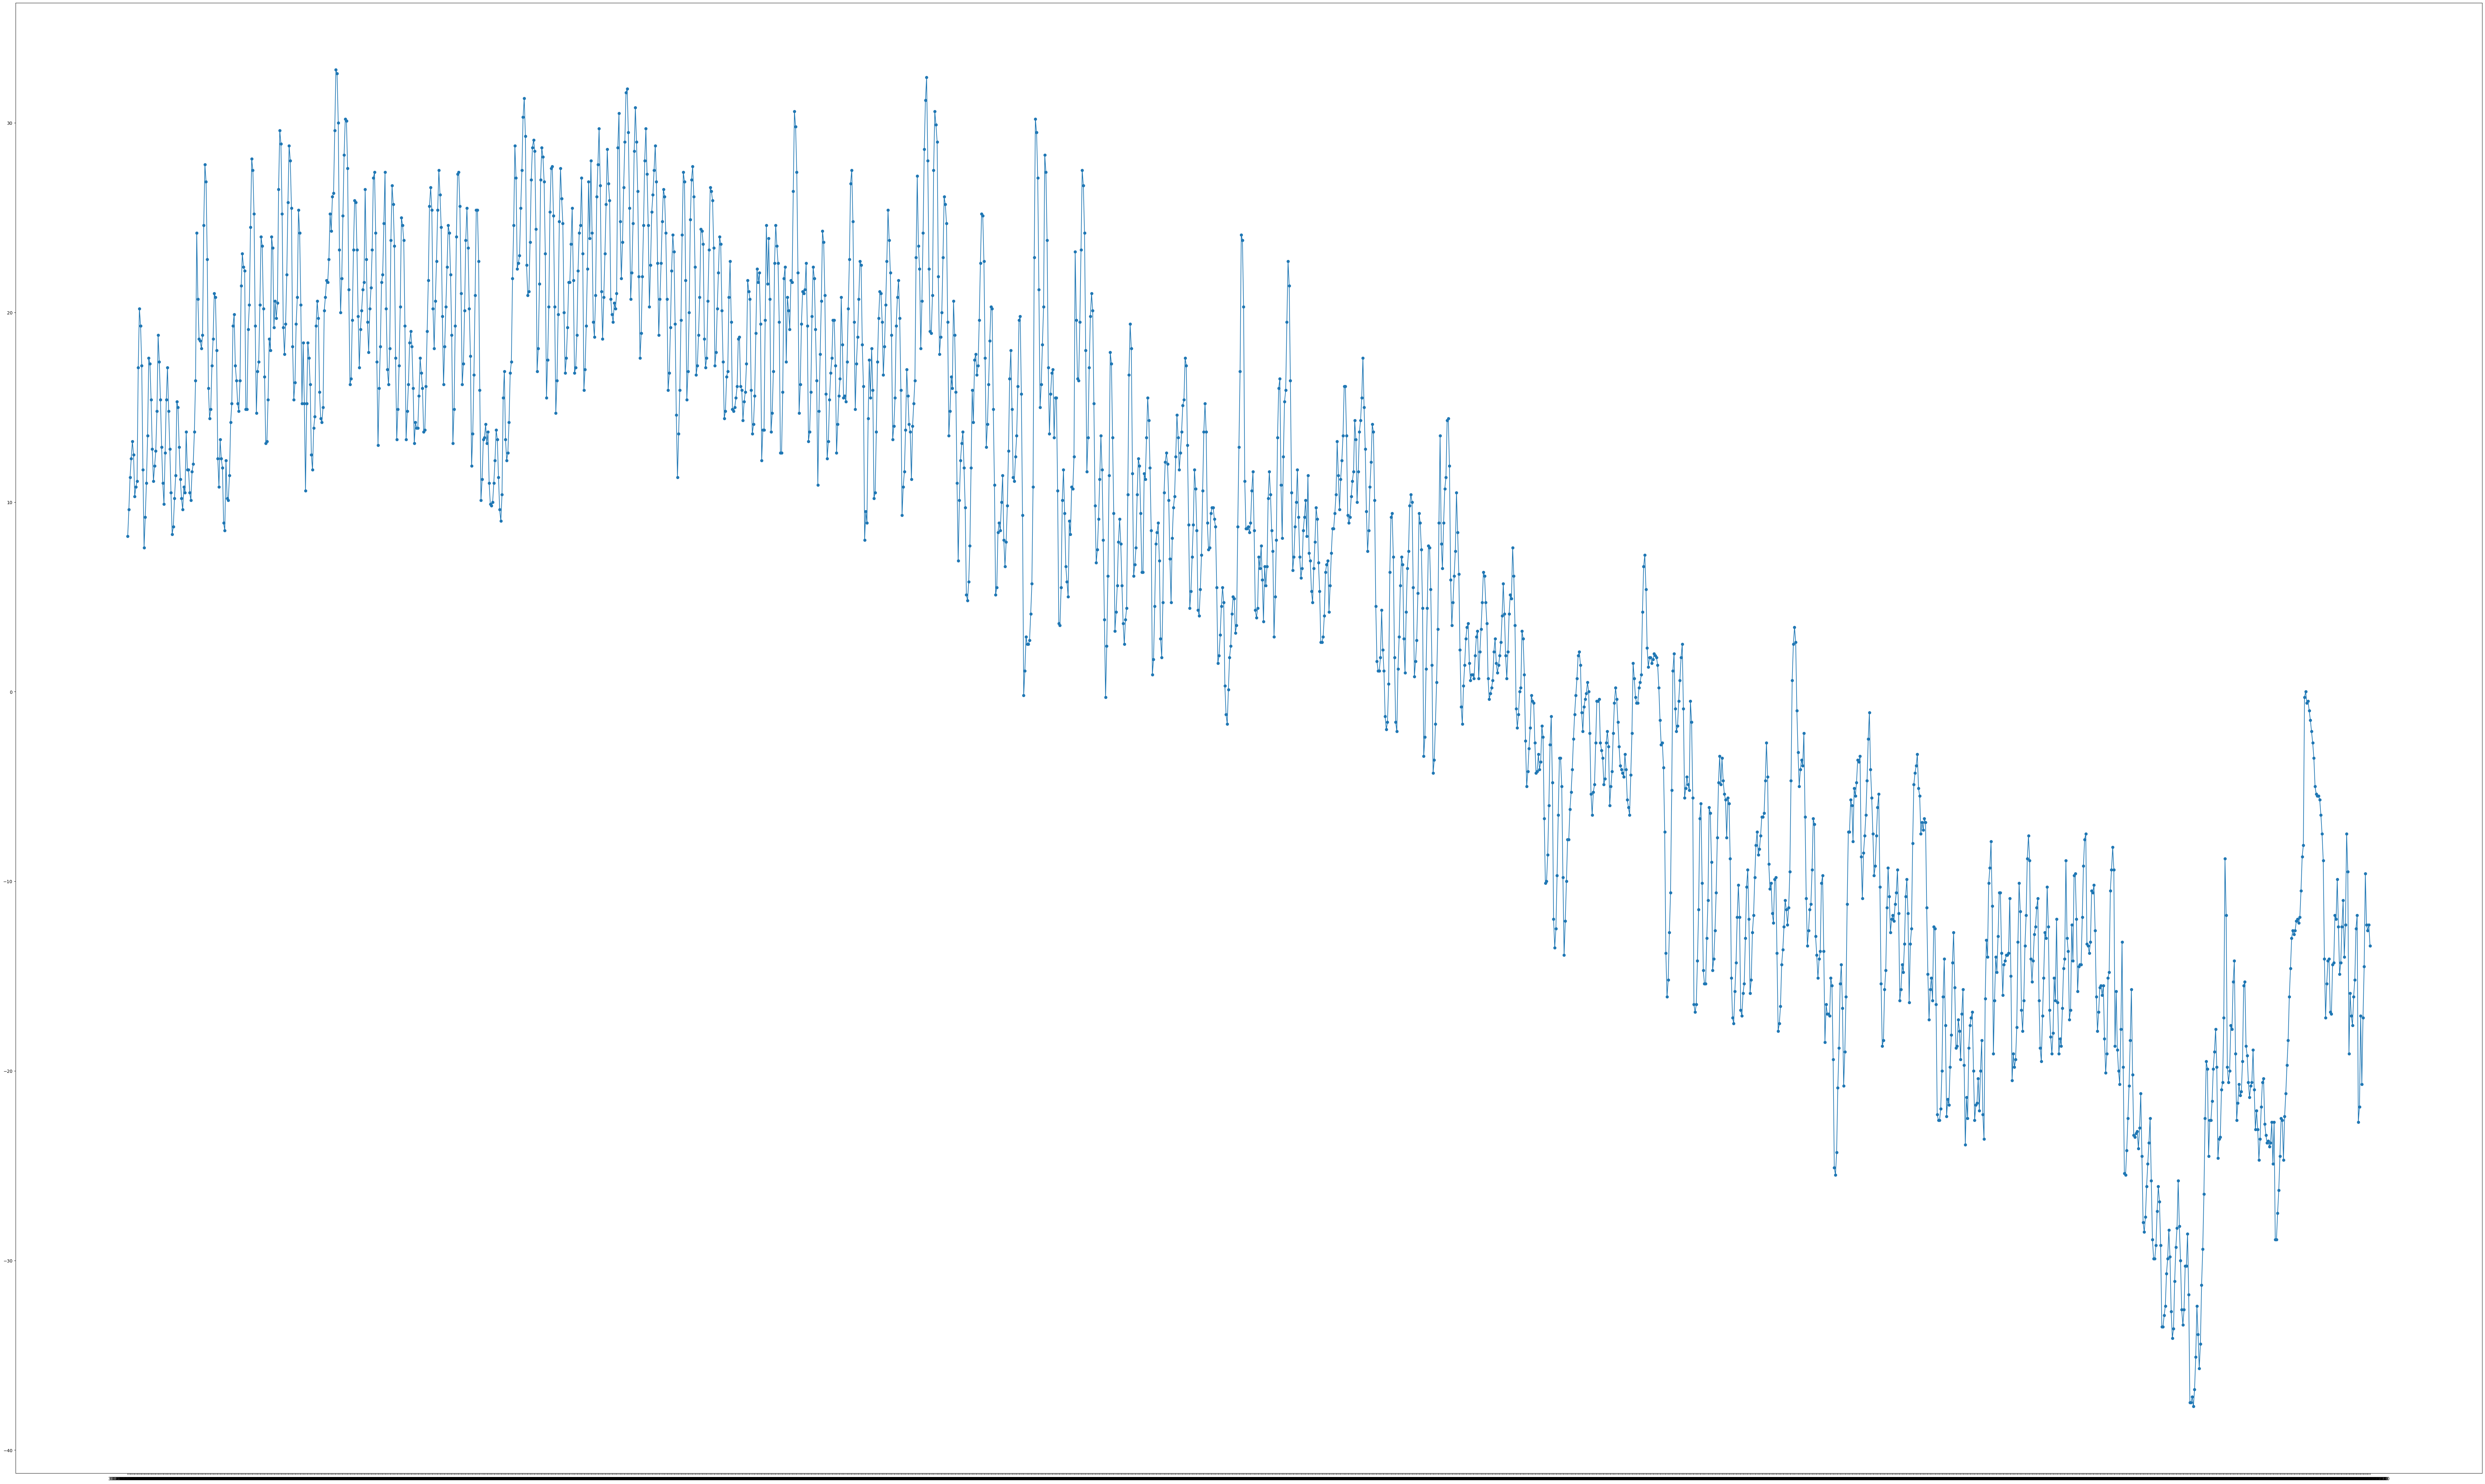

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_excel('/content/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls')

df1


plt.figure(figsize=(100, 60))
plt.plot(df1['Местное время в Астане'], df1['T'], marker='o', linestyle='-')

